## Importing the relevant libraries

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [2]:
data  = pd.read_csv("D:/libraries/Data Analyst/DataAnalyst.csv")

In [3]:
data.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


In [4]:
data.shape

(2253, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [6]:
def bar_plot(x, y,palette_len,title='Missing Values (%)', xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None,xlabel = None, ylabel = None, 
             figsize = (10,4),axis_grid = 'y'):
        
    cmap = sns.color_palette("plasma")
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title,size = 15, fontweight = 'bold',y=1.05,fontfamily='serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(True);ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = cmap)
    ax.set_xlim(xlim);ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    plt.xlabel(xlabel);plt.ylabel(ylabel)
    ax.grid(axis = axis_grid,ls='--',alpha = 0.9)
    plt.show()

In [7]:
data.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


we have negative numbers data in rating and fonunding columns

In [8]:
data.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [9]:
data.duplicated().sum()

0

In [10]:
(data.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [11]:
data.drop(['Unnamed: 0', 'Easy Apply','Competitors','Type of ownership','Headquarters','Revenue'],axis=1,inplace=True)

In [12]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Industry', 'Sector'],
      dtype='object')

In [13]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,1961,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,1893,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,2003,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,2002,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,2009,Sports & Recreation,"Arts, Entertainment & Recreation"


In [14]:
columns=[]
for col in data.columns:
    col_name=col.lower().split(' ')
    col_name='_'.join(col_name)
    columns.append(col_name)
    
data.columns=columns
data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'size', 'founded', 'industry', 'sector'],
      dtype='object')

### Handling missing values

In [15]:
data.isnull().sum()

job_title          0
salary_estimate    0
job_description    0
rating             0
company_name       1
location           0
size               0
founded            0
industry           0
sector             0
dtype: int64

we have values that is either -1,-1.0 ,'-1','-1' to change this do some sorting

In [16]:
data.replace(['-1.0', '-1', '1', -1],np.nan ,inplace=True)

In [17]:
data.isna().sum()

job_title            0
salary_estimate      1
job_description      0
rating             272
company_name         2
location             0
size               163
founded            660
industry           353
sector             353
dtype: int64

C:\Users\211BN\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


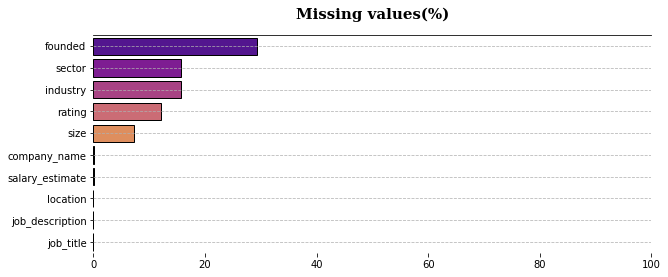

In [18]:
null_data=(data.isna().sum()/len(data)*100).sort_values(ascending=False)
bar_plot(x=null_data,y=null_data.index,palette_len=null_data.index,title='Missing values(%)',xlim=(0,100),
         xticklabels=range(0,101,20),yticklabels=null_data.index,figsize=(10,4),axis_grid='y')

In [19]:
# null values into persentage
for i in data.columns:
    null_rate=data[i].isna().sum()/len(data)*100
    if null_rate>0:
        print("{} null rate: {}%".format(i,round(null_rate,2)))

salary_estimate null rate: 0.04%
rating null rate: 12.07%
company_name null rate: 0.09%
size null rate: 7.23%
founded null rate: 29.29%
industry null rate: 15.67%
sector null rate: 15.67%


founded ,industry and sector columns have moree than 10% of null values 

In [20]:
# salary estimate only have one 1 missing values checking
data.loc[data['salary_estimate'].isna()]

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services


In [21]:
# finding the salary for Protingent company
data2=data['company_name'].fillna('').str.contains('Protingent')
data.loc[data2]

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector
2123,Engines Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Description\nPosition Title: Engines Confi...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services
2146,Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Qualifications:BA/BS in a related technica...,4.4,Protingent Staffing\n4.4,"Renton, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services


In [22]:
#same as the salary_estimate columns
salary_estimate =data.loc[data['company_name'].fillna('').str.contains('Protingent'),'salary_estimate'].to_list()[0]
data['salary_estimate'].fillna(salary_estimate,inplace=True)

In [23]:
data.loc[data2]

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector
2123,Engines Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Description\nPosition Title: Engines Confi...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services
2146,Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Qualifications:BA/BS in a related technica...,4.4,Protingent Staffing\n4.4,"Renton, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services
2149,Configuration/Data Management Analyst III,$55K-$101K (Glassdoor est.),Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services


In [24]:
# null values of salary estimate
data.isna().sum()
# we have cleared the single null value of salary estimate

job_title            0
salary_estimate      0
job_description      0
rating             272
company_name         2
location             0
size               163
founded            660
industry           353
sector             353
dtype: int64

In [25]:
# null values of rating
data.loc[data['rating'].isna()]

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,"Fairfield, NJ",1 to 50 employees,NaN,NaN,NaN
21,Data Science Analyst,$37K-$66K (Glassdoor est.),"Job Description\nOur client, a music streaming...",NaN,MUSIC & Entertainment,"New York, NY",Unknown,NaN,NaN,NaN
34,Data Analyst (Games),$46K-$87K (Glassdoor est.),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,"New York, NY",NaN,NaN,NaN,NaN
36,Data Business Analyst,$46K-$87K (Glassdoor est.),"At Clear Street, we are disrupting the institu...",NaN,Clear Street,"New York, NY",51 to 200 employees,2018.0,NaN,NaN
40,"Business Analyst, Data Platforms",$46K-$87K (Glassdoor est.),Company Description\n\nPinto is building the w...,NaN,Pinto,"New York, NY",1 to 50 employees,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2200,Data Analyst,$49K-$91K (Glassdoor est.),Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital","Centennial, CO",NaN,NaN,NaN,NaN
2202,Financial Data Analyst,$49K-$91K (Glassdoor est.),Position:Financial Data AnalystJob Description...,NaN,Black Knight Financial Technology Solutions,"Denver, CO",NaN,NaN,NaN,NaN
2239,Senior Contract Data Analyst,$78K-$104K (Glassdoor est.),OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.","Aurora, CO",NaN,NaN,NaN,NaN
2246,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN




We will keep all the rows with missing values on the rating column


In [26]:
# missing values of company name
data.loc[data['company_name'].isna()]

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector
1352,Data Analyst,$30K-$53K (Glassdoor est.),"Job Description\nETL, SQL Queries, Data Modeli...",NaN,NaN,"Dallas, TX",NaN,NaN,NaN,NaN
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,"Mooresville, NC",NaN,NaN,NaN,NaN




The missing values could indicate that the company hidden their company information on the job post.

For the rest of the columns, removing the Nulls will affect the analysis result because the high number of missing values in them.



#### checking company name


In [27]:
data['company_name']

0                Vera Institute of Justice\n3.2
1       Visiting Nurse Service of New York\n3.8
2                              Squarespace\n3.4
3                                 Celerity\n4.1
4                                  FanDuel\n3.9
                         ...                   
2248                         Avacend, Inc.\n2.5
2249                     Arrow Electronics\n2.9
2250                                   Spiceorb
2251           Contingent Network Services\n3.1
2252                            SCL Health\n3.4
Name: company_name, Length: 2253, dtype: object

In [28]:
# fixing the company name columns
data['company_name']=data['company_name'].apply(lambda x:str(x).split('\n')[0])
data['company_name']

0                Vera Institute of Justice
1       Visiting Nurse Service of New York
2                              Squarespace
3                                 Celerity
4                                  FanDuel
                       ...                
2248                         Avacend, Inc.
2249                     Arrow Electronics
2250                              Spiceorb
2251           Contingent Network Services
2252                            SCL Health
Name: company_name, Length: 2253, dtype: object

In [29]:
# salary estimate
data['salary_estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: salary_estimate, Length: 2253, dtype: object

In [30]:
data.isna().sum()
# only 1 columns have missing values that`s why we dont have enough value for plot

job_title            0
salary_estimate      0
job_description      0
rating             272
company_name         0
location             0
size               163
founded            660
industry           353
sector             353
dtype: int64

In [31]:
# salarY_estimate
data['salary_estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: salary_estimate, Length: 2253, dtype: object

In [32]:
salary_data=data['salary_estimate'].apply(lambda x:x.split(' ')[0].replace("$","").replace("K","").split('-'))

In [33]:
# data for low salary and high salary
data['Salary_low']=salary_data.apply(lambda x:x[0]).astype(float)
data['Salary_high']=salary_data.apply(lambda x:x[1]).astype(float)
data['average salary']=(data['Salary_low']+data['Salary_high'])/2

In [34]:
data.head()

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector,Salary_low,Salary_high,average salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,1961.0,Social Assistance,Non-Profit,37.0,66.0,51.5
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,1893.0,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000 employees,2003.0,Internet,Information Technology,37.0,66.0,51.5
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",201 to 500 employees,2002.0,IT Services,Information Technology,37.0,66.0,51.5
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000 employees,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",37.0,66.0,51.5


### Skill columns

In [35]:
data['job_description']

0       Are you eager to roll up your sleeves and harn...
1       Overview\n\nProvides analytical and technical ...
2       We’re looking for a Senior Data Analyst who ha...
3       Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4       ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...
                              ...                        
2248    Maintains systems to protect data from unautho...
2249    Position:\nSenior Data Analyst (Corporate Audi...
2250    Title: Technical Business Analyst (SQL, Data a...
2251    Summary\n\nResponsible for working cross-funct...
2252    You.\n\nYou bring your body, mind, heart and s...
Name: job_description, Length: 2253, dtype: object

In [36]:
def add_skill(data):
   
    skill_list = ['SQL', 'Excel', 'Tableau', 
              r'\br\b', 'Power BI', 'SAS', 
              'Word', 'PowerPoint', 'AWS', 
              'JavaScript', 'Python']

    for skill in skill_list:
        if skill == r'\br\b':
            data['R'] = np.where(data['job_description'].apply(lambda x: x.lower().replace('\n',' ').replace('  ',' ')).str.contains(skill),1,0)
        else:
            data[skill] = np.where(data['job_description'].apply(lambda x:x.lower().replace('\n',' ').replace('  ',' ')).str.contains(skill.lower()),1,0)
add_skill(data)
        

In [37]:
pd.set_option('display.max_columns',30)
data.head()

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector,Salary_low,Salary_high,average salary,SQL,Excel,Tableau,R,Power BI,SAS,Word,PowerPoint,AWS,JavaScript,Python
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,1961.0,Social Assistance,Non-Profit,37.0,66.0,51.5,1,0,0,1,0,0,0,0,1,0,1
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,1893.0,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5,1,1,0,1,0,1,1,1,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000 employees,2003.0,Internet,Information Technology,37.0,66.0,51.5,1,1,1,1,0,0,0,0,0,0,1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",201 to 500 employees,2002.0,IT Services,Information Technology,37.0,66.0,51.5,1,0,1,0,0,0,0,0,1,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000 employees,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",37.0,66.0,51.5,1,1,0,0,0,0,0,0,0,0,1


#### Add state columns

In [38]:
data['location']

0         New York, NY
1         New York, NY
2         New York, NY
3         New York, NY
4         New York, NY
             ...      
2248        Denver, CO
2249    Centennial, CO
2250        Denver, CO
2251    Centennial, CO
2252    Broomfield, CO
Name: location, Length: 2253, dtype: object

In [39]:
# we need the second word of the location columns
data['state'] = data['location'].apply(lambda x:x.split(', ')[-1])
data['state'].unique()

array(['NY', 'NJ', 'UT', 'CA', 'VA', 'FL', 'IL', 'TX', 'AZ', 'PA', 'DE',
       'OH', 'NC', 'SC', 'IN', 'WA', 'GA', 'KS', 'CO'], dtype=object)

### Fixing the company size column



The values in the company size column, size, are written as 501 - 1000 employees. This part remove the word employees from each values.


In [40]:
data['size'] =data.loc[~data['size'].isna(),'size'].apply(lambda x: x.replace('employees',''))
data

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector,Salary_low,Salary_high,average salary,SQL,Excel,Tableau,R,Power BI,SAS,Word,PowerPoint,AWS,JavaScript,Python,state
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961.0,Social Assistance,Non-Profit,37.0,66.0,51.5,1,0,0,1,0,0,0,0,1,0,1,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893.0,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5,1,1,0,1,0,1,1,1,0,0,0,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003.0,Internet,Information Technology,37.0,66.0,51.5,1,1,1,1,0,0,0,0,0,0,1,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",201 to 500,2002.0,IT Services,Information Technology,37.0,66.0,51.5,1,0,1,0,0,0,0,0,1,0,0,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",37.0,66.0,51.5,1,1,0,0,0,0,0,0,0,0,1,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO",51 to 200,NaN,Staffing & Outsourcing,Business Services,78.0,104.0,91.0,0,0,0,0,0,0,0,0,0,0,0,CO
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO",10000+,1935.0,Wholesale,Business Services,78.0,104.0,91.0,1,0,1,0,0,0,0,0,0,0,0,CO
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,78.0,104.0,91.0,1,1,0,0,0,0,0,0,0,0,0,CO
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO",201 to 500,1984.0,Enterprise Software & Network Solutions,Information Technology,78.0,104.0,91.0,1,0,0,1,0,0,0,0,0,0,1,CO


#### Clean job_title column

In [41]:
data['job_title'].nunique()

1272

In [42]:
data['job_title'].isna().sum()

0

In [43]:
data['job_title'].value_counts()[:50]

Data Analyst                                                                        405
Senior Data Analyst                                                                  90
Junior Data Analyst                                                                  30
Business Data Analyst                                                                28
Sr. Data Analyst                                                                     21
Data Quality Analyst                                                                 17
Data Analyst Junior                                                                  17
Data Analyst II                                                                      17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst          

In [44]:
data['job_title'].apply(lambda x:x.split(',')[0])[:50]

0                                          Data Analyst
1                                  Quality Data Analyst
2                                   Senior Data Analyst
3                                          Data Analyst
4                                Reporting Data Analyst
5                                          Data Analyst
6                          Business/Data Analyst (FP&A)
7                                  Data Science Analyst
8                                          Data Analyst
9                                          Data Analyst
10                                         Data Analyst
11                                         Data Analyst
12                                         DATA ANALYST
13                                  Senior Data Analyst
14                     Investment Advisory Data Analyst
15                          Sustainability Data Analyst
16                                         Data Analyst
17                                Clinical Data 

In [45]:
# strip the spaces and
data['job_title'] = data['job_title'].apply(lambda x:x.split(',')[0].strip())
data['job_title'] = data['job_title'].apply(lambda x:x.split('-')[0].strip())

In [46]:
data['job_title'].nunique()

976

In [47]:
data['job_title'] = data['job_title'].replace(
                    ['Sr. Data Analyst', 'Sr Data Analyst', 
                     'Data Analyst Senior', 'Senior Analyst'], 'Senior Data Analyst'
                )

data['job_title'] = data['job_title'].replace(
                    ['Jr. Data Analyst', 'Jr Data Analyst', 'Data Analyst Junior'], 'Junior Data Analyst'
            )

data['job_title'] = data['job_title'].replace(
                    ['Data Analyst I', 'Data Analyst II', 'Data Analyst III', 
                     'Data Analyst IV', 'Data Analyst V', 'Data Analyst 1',
                     'Data Analyst 2', 'Data Analyst 3', 'Data Analyst 4',
                     'Data Analyst 5', 'Analyst', 'Data Science Analyst'], 'Data Analyst', 
                )

In [48]:
data

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,industry,sector,Salary_low,Salary_high,average salary,SQL,Excel,Tableau,R,Power BI,SAS,Word,PowerPoint,AWS,JavaScript,Python,state
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961.0,Social Assistance,Non-Profit,37.0,66.0,51.5,1,0,0,1,0,0,0,0,1,0,1,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893.0,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5,1,1,0,1,0,1,1,1,0,0,0,NY
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003.0,Internet,Information Technology,37.0,66.0,51.5,1,1,1,1,0,0,0,0,0,0,1,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY",201 to 500,2002.0,IT Services,Information Technology,37.0,66.0,51.5,1,0,1,0,0,0,0,0,1,0,0,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009.0,Sports & Recreation,"Arts, Entertainment & Recreation",37.0,66.0,51.5,1,1,0,0,0,0,0,0,0,0,1,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO",51 to 200,NaN,Staffing & Outsourcing,Business Services,78.0,104.0,91.0,0,0,0,0,0,0,0,0,0,0,0,CO
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO",10000+,1935.0,Wholesale,Business Services,78.0,104.0,91.0,1,0,1,0,0,0,0,0,0,0,0,CO
2250,Technical Business Analyst (SQL,$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,78.0,104.0,91.0,1,1,0,0,0,0,0,0,0,0,0,CO
2251,Data Analyst,$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO",201 to 500,1984.0,Enterprise Software & Network Solutions,Information Technology,78.0,104.0,91.0,1,0,0,1,0,0,0,0,0,0,1,CO


In [49]:
data['job_title'].value_counts()[:10]

Data Analyst               627
Senior Data Analyst        180
Junior Data Analyst         53
Business Data Analyst       35
Data Quality Analyst        20
Lead Data Analyst           19
Financial Data Analyst      18
Data Governance Analyst     16
Data Reporting Analyst      14
Marketing Data Analyst      12
Name: job_title, dtype: int64

## Visualization

#### Salary distribution

C:\Users\211BN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\Users\211BN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0.5, 1.0, 'High Salary')

<Figure size 1008x504 with 0 Axes>

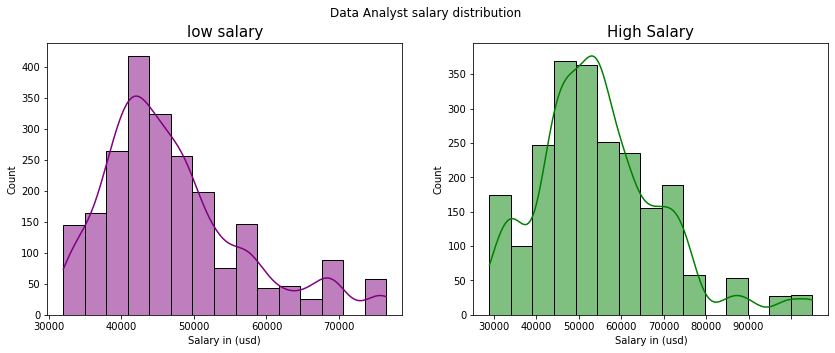

In [50]:
plt.figure(figsize=(14,7))
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
fig.suptitle('Data Analyst salary distribution')

sns.histplot(x='Salary_low',data=data,kde=True,ax=ax1,bins=15,color='purple')
sns.histplot(x='Salary_high',data=data,kde=True,ax=ax2,bins=15,color='green')
ax1.set_xticklabels(np.arange(20000,100000,step=10000))
ax2.set_xticklabels(np.arange(20000,100000,step=10000))
ax1.set_xlabel('Salary in (usd)')
ax2.set_xlabel('Salary in (usd)')

ax1.set_title('low salary',size=15)
ax2.set_title('High Salary',size=15)

#### Rating distribution

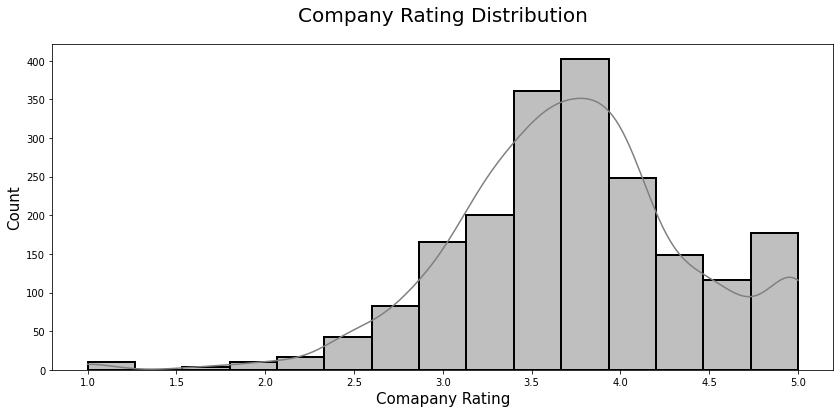

In [51]:
plt.figure(figsize=(14,6))

sns.histplot(x='rating',data=data,kde=True,color='grey',bins=15,linewidth=2)
plt.title('Company Rating Distribution',size=20,y=1.05)
plt.xlabel('Comapany Rating',size=15)
plt.ylabel('Count',size=15)
plt.show()

Text(0.5, 1.0, 'Rating ranking with count')

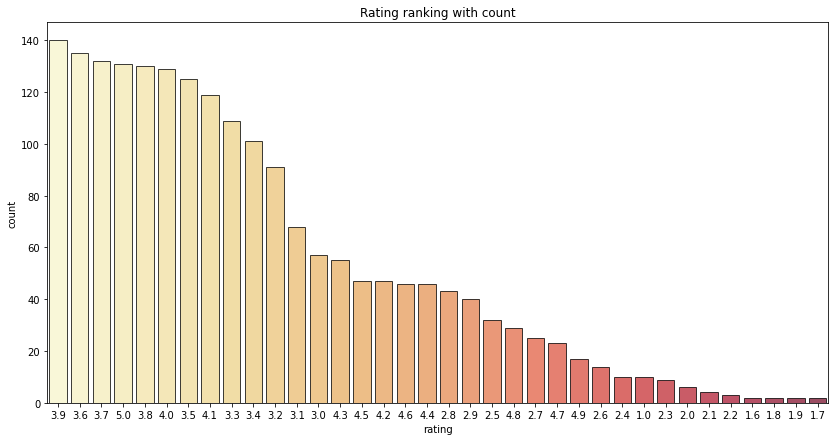

In [52]:
#count of rating with their rank
plt.figure(figsize=(14,7))
rating_na = data[data['rating']!=0]
rating = rating_na['rating'].value_counts().reset_index()
rating.rename(columns={"index":'rating','rating':'count'},inplace=True)
sns.barplot(data=rating,x='rating',y='count',order=data['rating'].value_counts().index,palette='YlOrRd',edgecolor='black',alpha=0.75)
plt.title('Rating ranking with count')

#### Number of job posts per job title

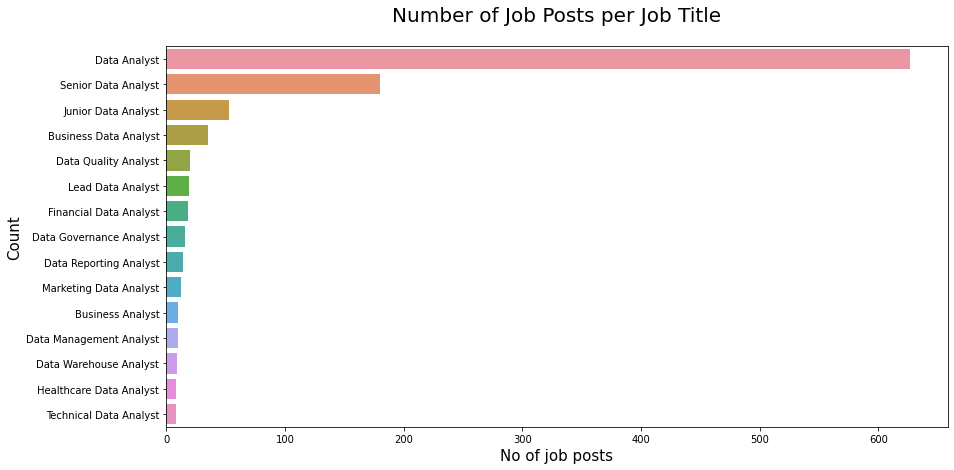

In [53]:
job_posts= data['job_title'].value_counts()[:15].reset_index()
job_posts.rename({'index':'job title','job_title':'count'},axis=1,inplace=True)
job_posts = job_posts.sort_values(by='count',ascending=False)
plt.figure(figsize=(14,7))
ax=sns.barplot(y='job title',x='count',data=job_posts)

plt.title('Number of Job Posts per Job Title',size=20,y=1.05)
plt.xlabel('No of job posts',size=15)

plt.ylabel('Count',size=15)
plt.show()

#### Company rating vs. salary

Most of the job posts are coming from companies with rating from 3 to 5. Some job posts from high rated companies are offering quite high salary for data analyst position.

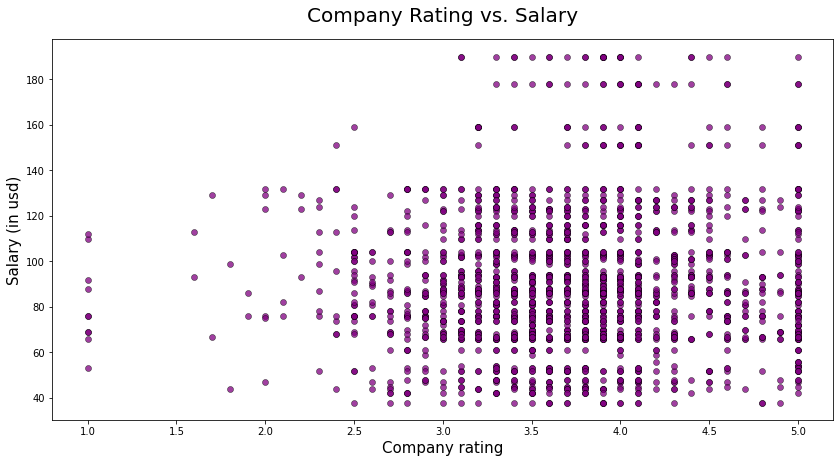

In [54]:
plt.figure(figsize=(14,7))
plt.scatter(data['rating'],data['Salary_high'],edgecolor='black',linewidth=0.5,alpha=0.75,color='purple')
plt.title('Company Rating vs. Salary',size=20,y=1.03)
plt.xlabel('Company rating',size=15)
plt.ylabel('Salary (in usd)',size=15)

plt.show()

#### Number of job post for each sector 

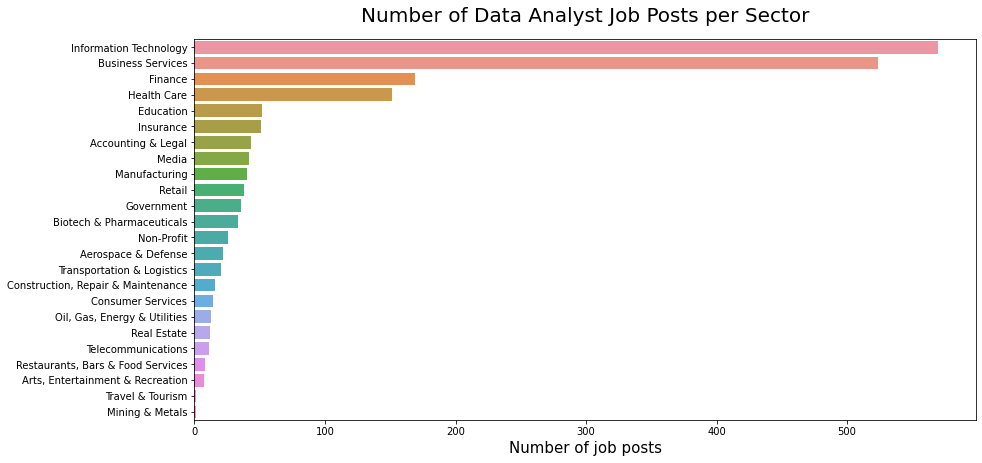

In [55]:
plt.figure(figsize=(14,7))
sns.countplot(data=data,y='sector',order=data['sector'].value_counts().index)
plt.title('Number of Data Analyst Job Posts per Sector',size=20,y=1.03)
plt.xlabel('Number of job posts',size=15)
plt.ylabel('')

plt.show()

### Job post for each company size

The number of job posts by companies that is relatively small with around 50 - 200 employees and relatively large with around 10,000 employees are higher than other company size.

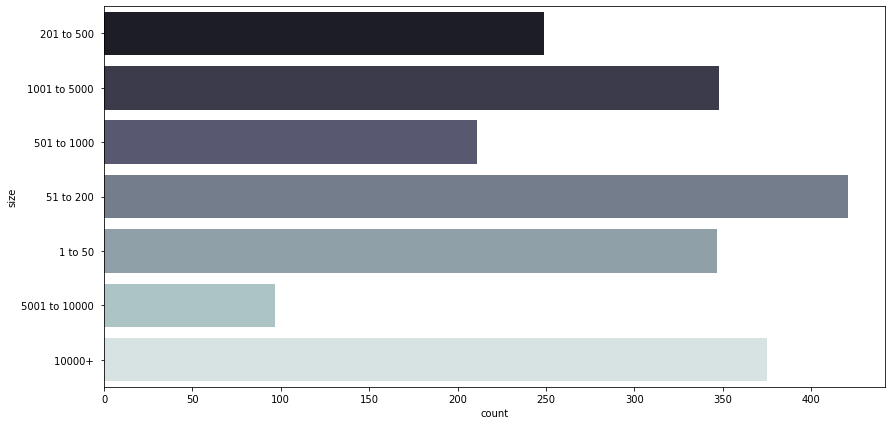

In [56]:
order = ['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000','10000+']
post_name =data[data['size']!='Unknown']
post = post_name['size'].value_counts().reset_index()
post.rename({"index":'size',"size":"count"},inplace=True,axis=1)
plt.figure(figsize=(14,7))
sns.barplot(y='size',x='count',data=post,order=post['size'].value_counts().index,palette='bone')
ax.set_title('Number of Data Analyst Job Posts per Company Size')
plt.show()

In [57]:
post

,size,count
0,51 to 200,421
1,10000+,375
2,1001 to 5000,348
3,1 to 50,347
4,201 to 500,249
5,501 to 1000,211
6,5001 to 10000,97


#### Job posts per company founded year



There are more jobs from companies that founded in around late 1980 to 2000


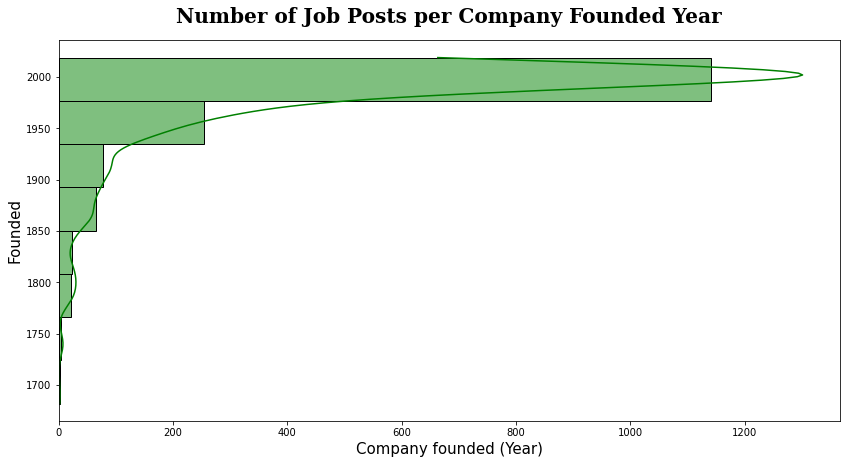

In [58]:

fig,ax=plt.subplots(figsize=(14,7))
sns.histplot(data=data,y='founded',kde=True,bins=8,color='green')
ax.set_title('Number of Job Posts per Company Founded Year',size=20,fontfamily='serif',weight='bold',y=1.03)
ax.set_xlabel('Company founded (Year)',size=15)
ax.set_ylabel('Founded',size=15)
plt.show()


### Number of job posts posted by companies 



Staffigo Technical Services, LLC posts the most data analyst job posts in the data

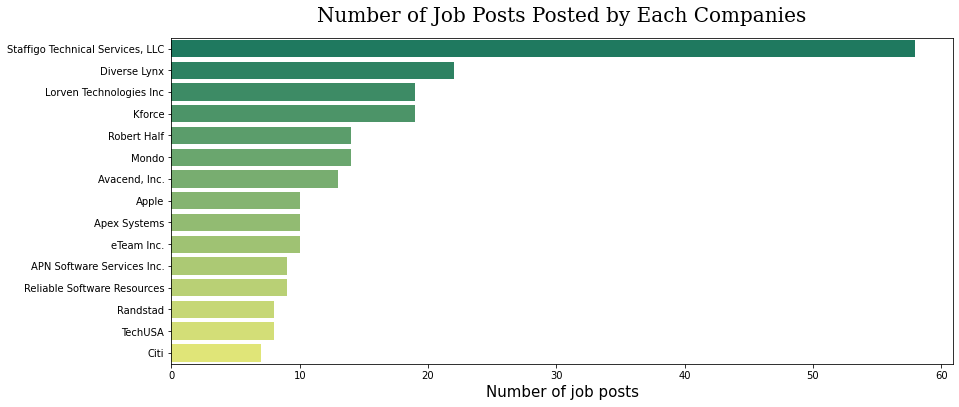

In [59]:
plt.figure(figsize=(14,6))
company_name = data['company_name'].value_counts()[:15].reset_index()
company_name.rename({"index":"company name","company_name":"count"},axis=1,inplace=True)
sns.barplot(y='company name',x='count',data=company_name,palette='summer')
plt.title('Number of Job Posts Posted by Each Companies',size=20,y=1.03,fontfamily='serif')
plt.xlabel('Number of job posts',size=15)
plt.ylabel('')
plt.show()

###  Job posts per state

Three states with the most job posts opening for data analyst are California, Texas, and New York.Three states with the most job posts opening for data analyst are California, Texas, and New York

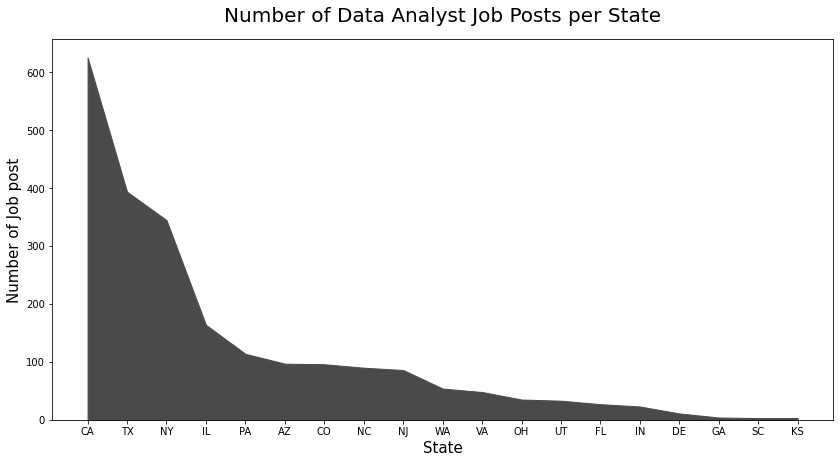

In [60]:
job = data['state'].value_counts().reset_index()
job.rename({"index":'state','state':'count'},inplace=True,axis=1)
plt.figure(figsize=(14,7))
plt.stackplot(job['state'],job['count'],color='#4a4a4a')
plt.title('Number of Data Analyst Job Posts per State',size=20,y=1.03)
plt.ylabel('Number of Job post',size=15)
plt.xlabel('State',size=15)

plt.show()

### Job posts per location 

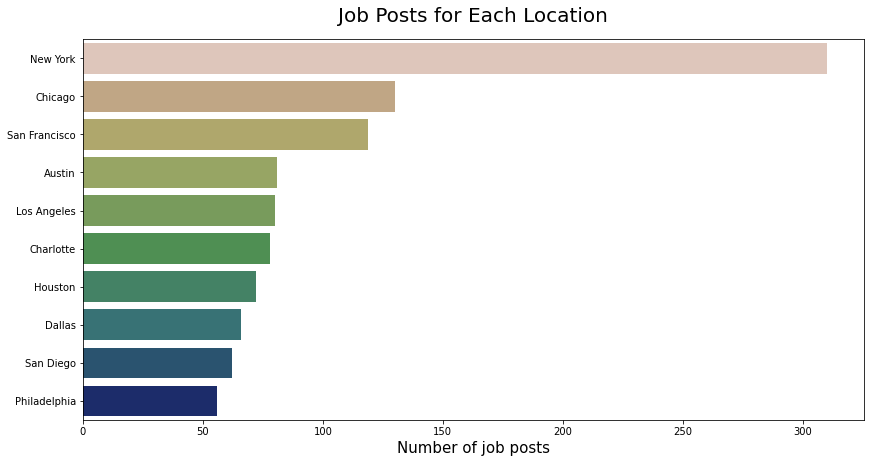

In [61]:
data['State/provience'] =data['location'].apply(lambda x:x.split(',')[0])
data2 =data['State/provience'].value_counts()[:10].reset_index()
data2.rename({"index":'State/provience','State/provience':'count'},axis=1,inplace=True)
fig,ax= plt.subplots(figsize=(14,7))
sns.barplot(y='State/provience',x='count',data=data2,palette='gist_earth_r')
ax.set_title('Job Posts for Each Location',size=20,y=1.03)
ax.set_xlabel('Number of job posts',size=15)
ax.set_ylabel('')
plt.show()

### The most in demand skills for data analyst 



SQL and Excel are the most in demand skills for data analyst with over 60% of the job posts mention them.


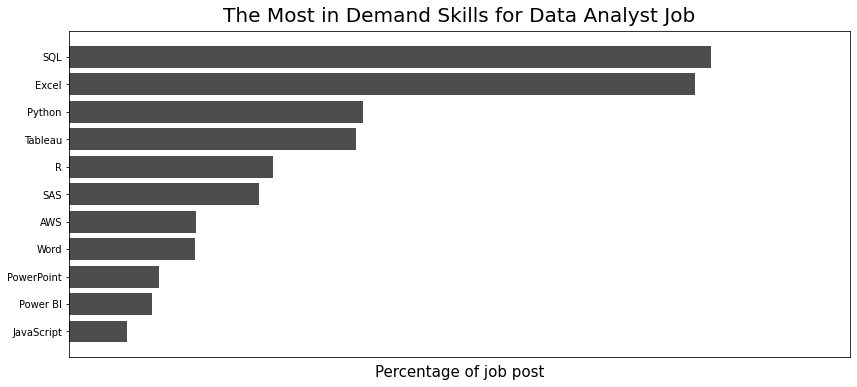

In [62]:
skills_data =data[('SQL, Excel, Tableau, R, Power BI, SAS, Word, PowerPoint, AWS, JavaScript, Python').split(', ')].sum().sort_values(ascending=True)
skill_data=skills_data/len(data)*100
fig,ax= plt.subplots(figsize=(14,6))
bars = ax.barh(skill_data.index,skill_data.values,color='#4d4d4d')
ax.set_title('The Most in Demand Skills for Data Analyst Job',size=20, y=1.01)
ax.set_xlabel('Percentage of job post',size=15)
ax.set_xticks([])

ax.set_xlim(right=75)

plt.show()

### Company size vs. salary



The size of the company doesn't mean much in term of the salary for a data analyst job.

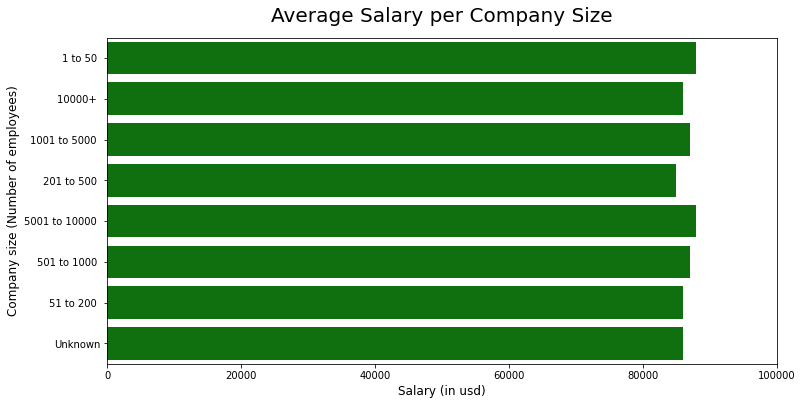

In [63]:
size_salary = data.groupby('size')['Salary_high'].median() * 1000

order = ['1 to 50', '51 to 200', '201 to 500', 
         '501 to 1000', '1001 to 5000', '5001 to 10000', 
         '10000+', 'Unknown']

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=size_salary.values, y=size_salary.index, color='green', ax=ax)

ax.set_title('Average Salary per Company Size',size=20,y=1.03)
ax.set_xlabel('Salary (in usd)',size=12)
ax.set_ylabel('Company size (Number of employees)',size=12)
ax.set_xlim(right=100_000)
plt.show()

### Highest paying sector 



Biotech and Pharmacuticals sector is the sector that offer the highest salary with minimum salary starting from around 60,000 and the maximum salary at around $110,000 per year.


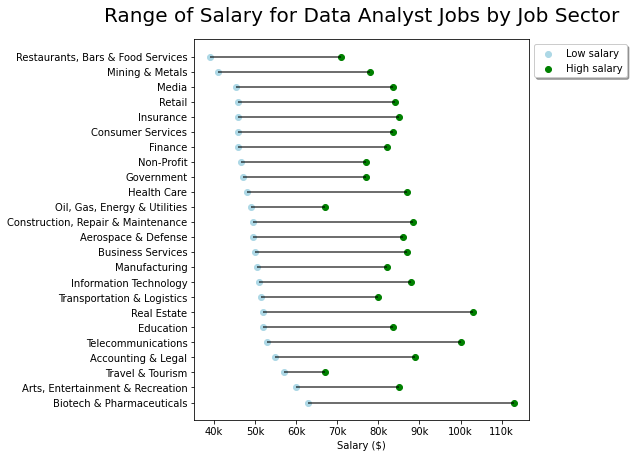

In [64]:
to_high = data.groupby(['sector']).agg(low_salary = ('Salary_low','median'),high_salary =('Salary_high','median')).sort_values(by='low_salary',ascending=True)
to_high_low = range(1,len(to_high)+1)
fig,ax=plt.subplots(figsize=(6,7))
ax.hlines(y=to_high_low,xmin='low_salary',xmax='high_salary',data=to_high,color='black',alpha=0.75)
ax.scatter(to_high['low_salary'],to_high_low,color='lightblue',label='Low salary')
ax.scatter(to_high['high_salary'],to_high_low,color='green',label='High salary')
ax.set_xticks(range(40,111,10),[str(num) +'k' for num in  list(range(40,111,10))])
ax.set_yticks(to_high_low,to_high.index)
ax.invert_yaxis()

ax.set_title('Range of Salary for Data Analyst Jobs by Job Sector', y=1.03,size=20)
ax.set_xlabel('Salary ($)')
ax.legend(loc='upper left',bbox_to_anchor=(1, 1), fancybox=True, shadow=True)

plt.show()

### Job discription

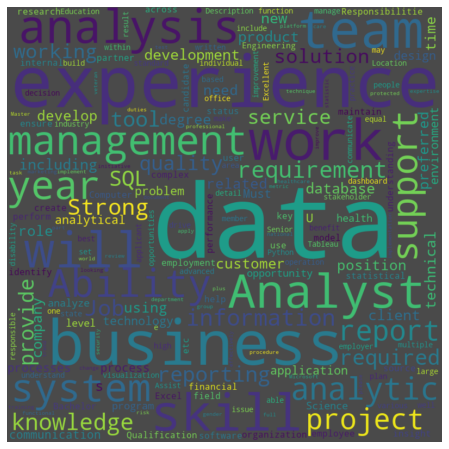

In [65]:
def job_description(data):
    data['job_discription']=data['job_description'].apply(lambda x:x.lower())
    unique=['\n', '  ', ':', ',', '.', '(', ')', '[', ']', '-']
    for char in unique:
        data['job_discription'] =data['job_description'].apply(lambda x:x.replace(char,' '))
        
    return data['job_description']
job_des = job_description(data.copy())



plt.figure(figsize=(12,8))
wordcloud =WordCloud( collocations=False,background_color='#4a4a4a',width=800,height=800).generate(''.join(job_des))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

####  High paying skills

In [66]:
def skills_py(data):
    cols =('SQL, Excel, Tableau, R, Power BI, SAS, Word, PowerPoint, AWS, JavaScript, Python')
    cols =cols.split(', ')
    for col in cols:
        data[col] =np.where(data[col]==1,data['Salary_high'],np.nan)
    return data[cols]

skill_set =skills_py(data.copy())

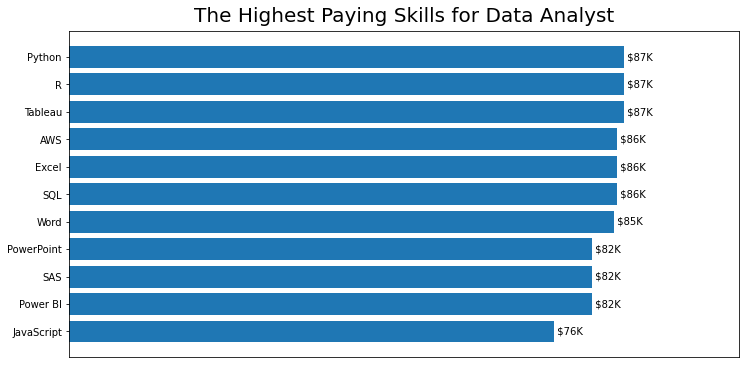

In [67]:
skill_set_da =skill_set.apply(np.nanmedian).sort_values()
fig,ax=plt.subplots(figsize=(12,6))
bars =ax.barh(skill_set_da.index,skill_set_da.values)
ax.bar_label(bars,fmt=' $%dK')
ax.set_title('The Highest Paying Skills for Data Analyst', y=1.01,size=20)

ax.set_xticks([])
ax.set_xlim(right=105)

plt.show()

In [68]:
data_subs =data.drop(['job_title', 'salary_estimate', 'job_description','company_name','state', 'State/provience','SQL','Excel','Tableau', 'R', 'Power BI', 'SAS', 'Word', 'PowerPoint', 'AWS','JavaScript'],axis=1)

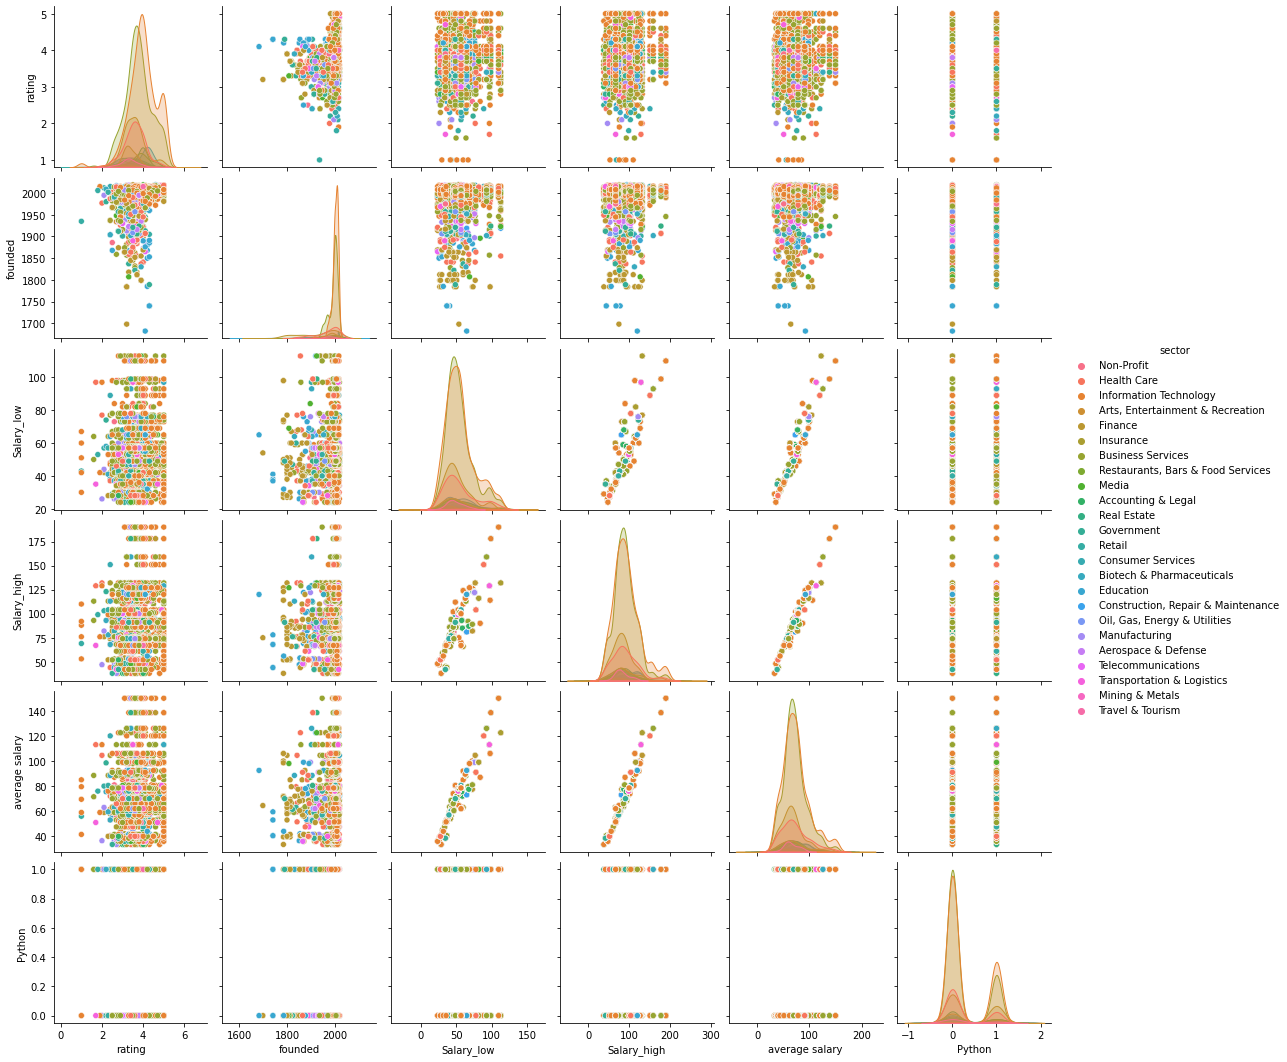

In [69]:
sns.pairplot(data=data_subs,hue='sector')